In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import pandas as pd

%matplotlib inline

plt.style.use('seaborn-whitegrid')

/tmp/ipykernel_749399/126544724.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
from util import get_files, parse_filename
import numpy as np

TYPE = 'sycamore'
directory = f'results/{TYPE}'
FONT_SIZE = 25

def parse_result_file(file):
  # Optimization:
  # iks: 2.00 ms
  # greedy: 2.00 ms
  # dpccp: 2.00 ms
  # lindp-iks: 2.00 ms

  # Contraction:
  # iks: 1.00 ms
  # greedy: 1.00 ms
  # dpccp: 1.00 ms
  # lindp-iks: 1.00 ms

  # Speedups:
  # iks: 95572266.86713023867694042473
  # greedy: 39353068.83343006384213580963
  # dpccp: 96023419.93957703927492447130
  # lindp-iks: 96023419.93957703927492447130

  def parseBlock(f):
    d = {'name' : None, 'content' : {}}
    while True:
      line = f.readline().strip()
      if not line:
        return d

      split = line.split(':')
      if len(split) == 1 or (not split[1]):
        d['name'] = split[0]
      else:
        d['content'][split[0]] = split[1].strip()

  with open(file, 'r') as f:
    info = []
    for _ in range(4):
      info.append(parseBlock(f))
    return info

def parse_files(files):
  def explain(class_, v, qsim=False):
    if class_ in ['Optimization', 'Contraction', 'Costs']:
      if qsim and class_ == 'Optimization':
        return float(v.split(' ')[0]) / 1e3
      return float(v.split(' ')[0])
    elif class_ == 'Speedup':
      return np.log10(float(v))

  ret = []
  def update_dict(file, block):
    class_ = block['name']
    info = parse_filename(file)

    for algo, val in block['content'].items():
      mydict = None
      if 'qsim' in info:
        mydict = {'class' : class_, 'leg' : 'closed', 'size' : info['size'], 'optimizer' : algo, 'value' : explain(class_, val, qsim=True)}
      else:
        mydict = {'class' : class_, 'leg' : info['leg'], 'size' : info['size'], 'optimizer' : algo, 'value' : explain(class_, val)}  
      ret.append(mydict)

  for file in files:
    info = parse_result_file(f'{directory}/{file}')
    for block in info:
      update_dict(file, block)
  return ret

ds = parse_files(get_files(directory))
df = pd.DataFrame(ds)
df = df.groupby(['class', 'leg', 'optimizer', 'size'], as_index=False).agg({'value': 'mean'})
df = df.sort_values(by=['class', 'leg', 'optimizer', 'size'], ignore_index=True)

optimizations = df[df['class'] == 'Optimization']
costs = df[df['class'] == 'Costs']

costs

,class,leg,optimizer,size,value
0,Costs,closed,cotengra-greedy,10,9.860193
1,Costs,closed,cotengra-greedy,12,13.240381
2,Costs,closed,cotengra-greedy,14,13.857298
3,Costs,closed,cotengra-greedy,16,17.344288
4,Costs,closed,cotengra-greedy,18,17.208824
5,Costs,closed,cotengra-greedy,20,18.370573
6,Costs,closed,cotengra-kahypar,10,9.828597
7,Costs,closed,cotengra-kahypar,12,13.106970
8,Costs,closed,cotengra-kahypar,14,13.825793
9,Costs,closed,cotengra-kahypar,16,16.610387


In [3]:
markers = ["o", "o", "o", "s", "s", "s", "P", "P", "P", "<", "<", "<"]
mycolors = [ "tab:purple", "tab:orange", "tab:cyan", "tab:pink", "tab:blue", "tab:red", "tab:olive", "tab:green" ]

# Order of the algorithm in the label.
translate = {
  "tensor-ikkbz-parallel" : "TensorIKKBZ+",
  "lindp-parallel" : "LinDP+",
  "cotengra-greedy" : "ctg.Hyper-Greedy+",
  "cotengra-kahypar" : "ctg.Hyper-Par+"
}
updated = {}
for key in translate:
  updated[f'raw-{key}'] = f'{translate[key][:-1]}'
translate.update(updated)

result = [ 'TensorIKKBZ', 'LinDP', 'ctg.Hyper-Greedy', 'ctg.Hyper-Par',
            'TensorIKKBZ+', 'LinDP+', 'ctg.Hyper-Greedy+', 'ctg.Hyper-Par+',]

def setup_colors():
  mysetup = {}
  count = 0
  for elem in result:
    mysetup[elem] = {"color" : mycolors[count], "marker" : markers[count]}
    count += 1
  return mysetup

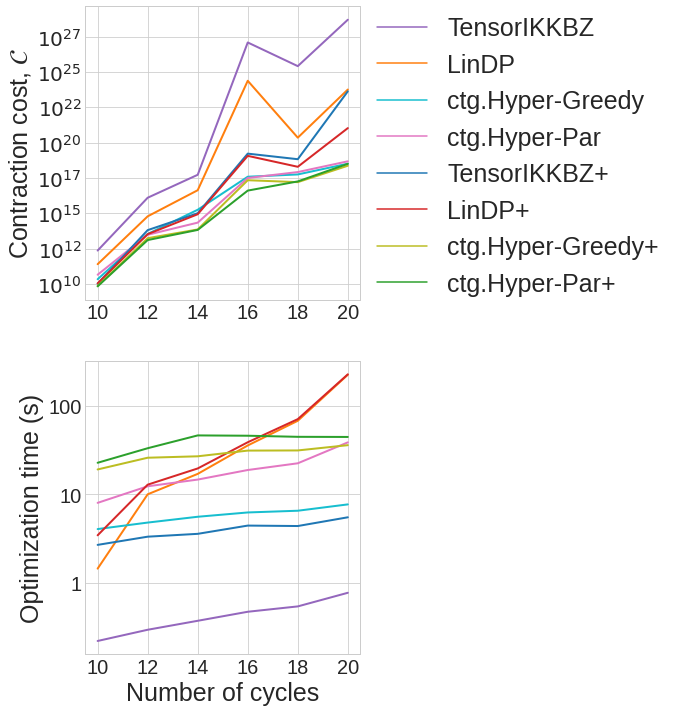

In [8]:
import seaborn as sns

custom_nrows = 2
custom_ncols = 1

def get(axs, i, j):
  if i >= custom_nrows:
    i = custom_nrows - 1
  if j >= custom_ncols:
    j = custom_ncols - 1
  if custom_nrows == 1:
    return axs[j]
  if custom_ncols == 1:
    return axs[i]
  return axs[i][j]

def cleanse(data):
  # Replace algorithms name.
  for key, val in translate.items():
    data = data.replace(to_replace=key, value=val)

  # Remove algorithms we don't want to benchmark right now.
  to_remove = ['IDP[LinDP]']
  new_result = result.copy()
  for val in to_remove:
    data = data.loc[data["optimizer"] != val]
    for index in range(len(new_result)):
      if new_result[index] == val:
        new_result.pop(index)
        break

  # Update `result`, i.e., the list of algorithms on the legend.
  changed = True
  while changed:
    changed = False
    for index in range(len(new_result)):
      if new_result[index] not in data['optimizer'].unique():
        new_result.pop(index)
        changed = True
        break
  return data, new_result

def setup(data, leg, ylabels):
  # Cleanse data.
  data[0], new_result = cleanse(data[0])
  data[1], new_result = cleanse(data[1])

  mysetup = setup_colors()
  mycolors = [mysetup[algo]["color"] for algo in new_result]
  customPalette = sns.set_palette(sns.color_palette(mycolors))

  fig, axs = plt.subplots(nrows=custom_nrows, ncols=custom_ncols, figsize=(5 * custom_ncols, 5 * custom_nrows), sharey=False, sharex=False, constrained_layout=False)
  df = [
    data[0].sort_values(by=['size'], ignore_index=True),
    data[1].sort_values(by=['size'], ignore_index=True)
  ]
  
  def compute_lw(data):
    min_ = data['size'].min()
    max_ = data['size'].max()
    if max_ - min_ > 200:
      return 1.25
    else:
      return 2.0
  
  for i in range(custom_nrows):
    for j in range(custom_ncols):
      data = df[i]
      
      # Split dataset only if we have multiple regions.
      if (custom_ncols > 1):
        if not j:
          data = data.loc[data['size'] <= 30]
        elif j == 1:
          data = data.loc[data['size'] > 30]
          data = data.loc[data['size'] <= 200]
        elif j == 2:
          data = data.loc[data['size'] >= 200] 

      # Draw the line.
      ret = sns.lineplot(linewidth=compute_lw(data), ax=get(axs, i, j), x="size", y="value", hue="optimizer", data=data, errorbar=None, hue_order=new_result, palette=customPalette)
      
      # Set the scale of the y-axis.
      if 'time' in ylabels[i].lower():
        ret.set(yscale='log')

  return fig, axs

def plot(data1, data2, leg, ylabels):
  data = [data1, data2]
  data[0] = data[0].loc[data[0]['leg'] == leg]
  data[1] = data[1].loc[data[1]['leg'] == leg]

  # Fetch the figure.
  fig, axs = setup(data, leg, ylabels)
  fig.tight_layout()

  # Put the title.
  # get(axs, 0, 1).set_title(label=f'Sycamore-53', size=18)

  for i in range(custom_nrows):
    for j in range(custom_ncols):
      # Set xlabel.
      if i:
        get(axs, i, j).set(xlabel=r'Number of cycles')
      else:
        get(axs, i, j).xaxis.label.set_visible(False)
      
      # Set ylabel.
      if j:
        get(axs, i, j).yaxis.label.set_visible(False)
      else:
        get(axs, i, j).set(ylabel=ylabels[i])

      # Set off the legend.
      get(axs, i, j).get_legend().set_visible(False)

  # Setup the legend.
  sns.move_legend(get(axs, 0, 2), bbox_to_anchor=(1.025, 1.0), loc=2, borderaxespad=0.0, title=None, fontsize=FONT_SIZE, frameon=False)

  # Set fontsizes.
  plt.rcParams['axes.labelsize'] = FONT_SIZE
  plt.rc('xtick', labelsize=14)
  plt.rc('ytick', labelsize=14)

  # Format the axes.
  get(axs, 0, 0).yaxis.set_major_formatter(tick.FuncFormatter(lambda x, y : '$10^{' + str(int(float(x))) + '}$'))
  get(axs, 1, 0).yaxis.set_major_formatter(tick.FuncFormatter(lambda x, y : int(float(x))))

  # Save figure.
  plt.savefig(f'figures/{TYPE}-{leg}-full-all.png', bbox_inches='tight', dpi=300)

plot(costs, optimizations, 'closed', [r'Contraction cost, $\mathcal{C}$', r'Optimization time (s)'])